Total time:  1 : 0.14529728889465332
Total time:  2 : 0.09267044067382812
Total time:  3 : 0.829448938369751
Total time:  4 : 1.341294765472412
Total time:  5 : 0.08830928802490234
Total time:  6 : 1.4389424324035645
Total time:  7 : 1.243032455444336
Total time:  8 : 1.207183837890625
Total time:  9 : 0.1624135971069336
Total time:  10 : 1.8261215686798096
Total time:  11 : 0.11891412734985352
Total time:  12 : 1.0222246646881104
Total time:  13 : 1.276792287826538
Total time:  14 : 0.5649354457855225
Total time:  15 : 0.8407173156738281
Total time:  16 : 1.5780725479125977
Total time:  17 : 1.0943706035614014
Total time:  18 : 1.364278793334961
Total time:  19 : 0.6169955730438232


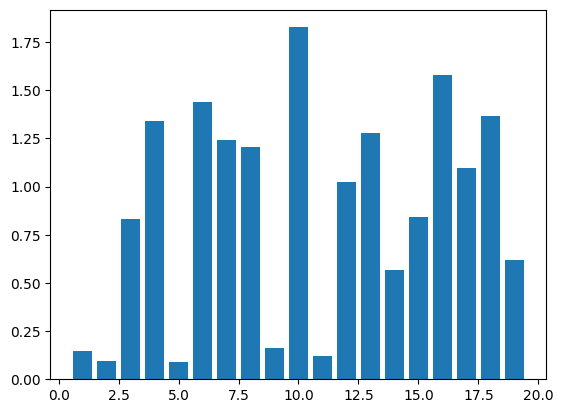

In [2]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open(r"C:\Users\Tototime\Desktop\Project_DataMining\Ramen\25525.jpg")
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
X = []
Y = []
for x in range(1, 20):
    cluster_count = x

    start_time = time.time()
    clusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
    clusters.fit(numarray)
    end_time = time.time()
    total_time = end_time - start_time
    print("Total time: ", x, ":", total_time)
    X.append(x)
    Y.append(total_time)
plot.bar(X, Y)
plot.show()

Number of images:  115008
Input data:  [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
Label: 0


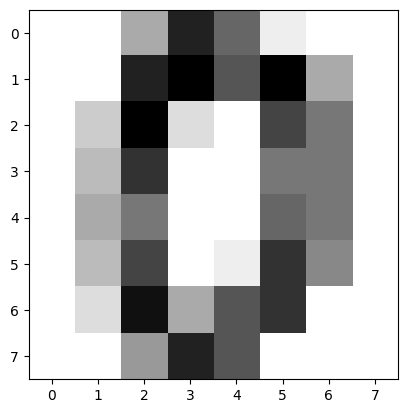

In [3]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plot

digits = datasets.load_digits()

print("Number of images: ", digits.images.size)
print("Input data: ", digits.images[0])
print("Label:", digits.target[0])

plot.imshow(digits.images[0], cmap=plot.cm.gray_r)
plot.show()

In [5]:
from sklearn import tree
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = [
    ["green", "nature", "thumbnail", "landscape"],
    ["blue", "architecture", "medium", "portrait"],
    ["blue", "people", "medium", "landscape"],
    ["yellow", "nature", "medium", "portrait"],
    ["green", "nature", "thumbnail", "landscape"],
    ["blue", "people", "medium", "landscape"],
    ["blue", "nature", "thumbnail", "portrait"],
    ["yellow", "architecture", "thumbnail", "landscape"],
    ["blue", "people", "medium", "portrait"],
    ["yellow", "nature", "medium", "landscape"],
    ["yellow", "people", "thumbnail", "portrait"],
    ["blue", "people", "medium", "landscape"],
    ["red", "architecture", "thumbnail", "landscape"],
]
result = [
    "Favorite",
    "NotFavorite",
    "Favorite",
    "Favorite",
    "Favorite",
    "Favorite",
    "Favorite",
    "NotFavorite",
    "NotFavorite",
    "Favorite",
    "Favorite",
    "NotFavorite",
    "NotFavorite",
]


# creating dataframes
dataframe = pd.DataFrame(data, columns=["color", "tag", "size", "mode"])
resultframe = pd.DataFrame(result, columns=["favorite"])

# generating numerical labels
le1 = LabelEncoder()
dataframe["color"] = le1.fit_transform(dataframe["color"])

le2 = LabelEncoder()
dataframe["tag"] = le2.fit_transform(dataframe["tag"])

le3 = LabelEncoder()
dataframe["size"] = le3.fit_transform(dataframe["size"])

le4 = LabelEncoder()
dataframe["mode"] = le4.fit_transform(dataframe["mode"])

le5 = LabelEncoder()
resultframe["favorite"] = le5.fit_transform(resultframe["favorite"])

# Use of decision tree classifiers
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(dataframe.values, resultframe)

# prediction
prediction = dtc.predict(
    [
        [
            le1.transform(["red"])[0],
            le2.transform(["nature"])[0],
            le3.transform(["thumbnail"])[0],
            le4.transform(["portrait"])[0],
        ]
    ]
)
print(le5.inverse_transform(prediction))
print(dtc.feature_importances_)

['Favorite']
[0.16595745 0.69574468 0.         0.13829787]
